In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os, sys
import re
import collections
import ast

In [2]:
#pool_results_folder = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/FINAL_RESULTS/without_sanity_check"
pool_results_folder = "/g/korbel2/weber/MosaiCatcher_files/DEMULTIPLEXING_POOLS/DEMULTIPLEXING_POOLS/FINAL_RESULTS/without_sanity_check"

In [3]:
ldir = [e for e in os.listdir(pool_results_folder) if e.startswith("20")]
ldir = sorted([e for e in os.listdir(pool_results_folder) if e.startswith("20") and e != "2022-11-15-H33JMAFX5--HGSVCpool1xulOPxmanual"])
print(len(ldir))
ldir

21


['2021-07-29-HWYJ2AFX2--HGSVCxpool1x01',
 '2021-08-03-H22VWAFX3--HGSVCxpool2x02',
 '2021-08-03-H22VWAFX3--HGSVCxpool3x01',
 '2022-11-15-H33JMAFX5--HGSVCpool1xulOPxEcho',
 '2022-11-25-H37MNAFX5--HGSVCpool1quadrant2KAPA',
 '2023-02-08-HCN3VAFX5--HGSVCpool2',
 '2023-02-08-HCN3VAFX5--HGSVCpool2iTRUE5',
 '2023-03-08-HCNGHAFX5--HGSVCpool2OPSfromFrozen2ul',
 '2023-03-08-HCNGHAFX5--HGSVCpool2inWell2ul',
 '2023-03-08-HCNGHAFX5--HGSVCpool2inWell5ul',
 '2023-04-21-HGF2CAFX5--LanexHGSVCpool2500nlEcho',
 '2023-04-26-HCMMNAFX5--HGSVCpool2OPS500nl',
 '2023-04-26-HCMMNAFX5--HGSVCpool2iinWell2ulLS',
 '2023-06-23-HGFLGAFX5--HGSVCpool3UVled',
 '2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW',
 '2023-11-09-HW5NFAFX5--HGSVCpool1NEW',
 '2023-11-27-HNKL2AFX5--HGSVCpool3NEW',
 '2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96wellUVLED',
 '2024-01-30-AACT75KM5--HGSVCpool1NEWp2',
 '2024-01-30-AACT75KM5--HGSVCpool3NEWp2',
 '2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED']

In [4]:
p = re.compile('.*(pool[1-3]).*')
#ldir = [e for e in os.listdir(pool_results_folder) if e.startswith("20")]
d = collections.defaultdict(list)
for e in ldir:
    pool = p.match(e).group(1)
    var = "NEW" if "NEW" in e else "OLD"
    d[f"{pool}_{var}"].append(e)
d

defaultdict(list,
            {'pool1_OLD': ['2021-07-29-HWYJ2AFX2--HGSVCxpool1x01',
              '2022-11-15-H33JMAFX5--HGSVCpool1xulOPxEcho',
              '2022-11-25-H37MNAFX5--HGSVCpool1quadrant2KAPA'],
             'pool2_OLD': ['2021-08-03-H22VWAFX3--HGSVCxpool2x02',
              '2023-02-08-HCN3VAFX5--HGSVCpool2',
              '2023-02-08-HCN3VAFX5--HGSVCpool2iTRUE5',
              '2023-03-08-HCNGHAFX5--HGSVCpool2OPSfromFrozen2ul',
              '2023-03-08-HCNGHAFX5--HGSVCpool2inWell2ul',
              '2023-03-08-HCNGHAFX5--HGSVCpool2inWell5ul',
              '2023-04-21-HGF2CAFX5--LanexHGSVCpool2500nlEcho',
              '2023-04-26-HCMMNAFX5--HGSVCpool2OPS500nl',
              '2023-04-26-HCMMNAFX5--HGSVCpool2iinWell2ulLS'],
             'pool3_OLD': ['2021-08-03-H22VWAFX3--HGSVCxpool3x01',
              '2023-06-23-HGFLGAFX5--HGSVCpool3UVled'],
             'pool2_NEW': ['2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW',
              '2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW

In [5]:
p = re.compile('.*(pool[1-3]).*')
#ldir = [e for e in os.listdir(pool_results_folder) if e.startswith("20")]
d_tmp = collections.defaultdict()
for e in ldir:
    pool = p.match(e).group(1)
    var = "NEW" if "NEW" in e else "OLD"
    d_tmp[e.split("--")[1]] = f"{pool}_{var}"
d_tmp

defaultdict(None,
            {'HGSVCxpool1x01': 'pool1_OLD',
             'HGSVCxpool2x02': 'pool2_OLD',
             'HGSVCxpool3x01': 'pool3_OLD',
             'HGSVCpool1xulOPxEcho': 'pool1_OLD',
             'HGSVCpool1quadrant2KAPA': 'pool1_OLD',
             'HGSVCpool2': 'pool2_OLD',
             'HGSVCpool2iTRUE5': 'pool2_OLD',
             'HGSVCpool2OPSfromFrozen2ul': 'pool2_OLD',
             'HGSVCpool2inWell2ul': 'pool2_OLD',
             'HGSVCpool2inWell5ul': 'pool2_OLD',
             'LanexHGSVCpool2500nlEcho': 'pool2_OLD',
             'HGSVCpool2OPS500nl': 'pool2_OLD',
             'HGSVCpool2iinWell2ulLS': 'pool2_OLD',
             'HGSVCpool3UVled': 'pool3_OLD',
             'LanexHGSVCpool2NEW': 'pool2_NEW',
             'HGSVCpool1NEW': 'pool1_NEW',
             'HGSVCpool3NEW': 'pool3_NEW',
             'LanexHGSVCpool2NEW96wellUVLED': 'pool2_NEW',
             'HGSVCpool1NEWp2': 'pool1_NEW',
             'HGSVCpool3NEWp2': 'pool3_NEW',
             'HGSVCpool2N

In [6]:
k = "pool2_NEW"

In [7]:
#output_dir = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/FINAL_RESULTS/cross_analysis"
output_dir = "/g/korbel2/weber/MosaiCatcher_files/DEMULTIPLEXING_POOLS/DEMULTIPLEXING_POOLS/FINAL_RESULTS/cross_analysis"

In [8]:
os.makedirs(f"{output_dir}/{k}", exist_ok=True)

In [28]:
pool_list = list()
#k = "pool1_OLD"


for e in d[k]:
    tmp_df = pd.read_csv(f"{pool_results_folder}/{e}/cell_count_by_sample_and_superpop_DATA.csv", sep="\t")
    tmp_df["PoolID"] = k
    tmp_df["PoolDataset"] = e
    pool_list.append(tmp_df)
df = pd.concat(pool_list)

# Find all unique Superpopulations and Datasets
unique_superpopulations = df['Superpopulation'].unique()
unique_datasets = df['PoolDataset'].unique()

# Generate a list of colors and hatches
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]
hatch_patterns = ["", "///", "***", "---", "ooo", "OOO", "+++", "\\\\\\", "|||"]

# Create a color dictionary and a hatch dictionary
color_dict = dict(zip(unique_superpopulations, colors))
hatch_dict = dict(zip(unique_datasets, hatch_patterns))

# Add a color and hatch column to the dataframe based on 'Superpopulation' and 'Dataset'
#df['color'] = df['Superpopulation'].map(color_dict)
df['hatch'] = df['PoolDataset'].map(hatch_dict)
df.loc[df["SampleID"] == "HG04115", "color"] = "(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)"

df['color'] = df['color'].apply(ast.literal_eval)

# Sort df if necessary
df = df.sort_values(by=["Superpopulation", "SampleID"])

#df.to_csv(f"{output_dir}/{k}/{k}_data.tsv", index=False, sep="\t")

df

,Superpopulation,SampleID,cell,color,PoolID,PoolDataset,hatch
0,AFR,HG01884,5,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
0,AFR,HG02014,4,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW,
1,AFR,HG02014,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
2,AFR,HG02055,2,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
0,AFR,HG02307,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,***
...,...,...,...,...,...,...,...
37,SAS,NA20885,1,"(0.17254901960784313, 0.6274509803921569, 0.17...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,***
38,SAS,NA21126,5,"(0.17254901960784313, 0.6274509803921569, 0.17...",pool2_NEW,2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW,
68,SAS,NA21126,0,"(0.17254901960784313, 0.6274509803921569, 0.17...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
38,NaN,HG01453,0,"(0.596078431372549, 0.8745098039215686, 0.5411...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,***


In [30]:
df.SampleID.nunique()

109

In [16]:
df.loc[df["SampleID"] == "HG02148"].cell.sum()

85

In [17]:
df.shape

(57, 7)

In [10]:
unique_superpopulations

array(['AFR', 'AMR', 'EAS', 'EUR', 'SAS', nan], dtype=object)

In [11]:
df.SampleID.nunique()

40

In [10]:
import yaml
file_path = "pools_composition.yaml"
reference_sample_list = yaml.safe_load(open(file_path, "r"))

In [13]:
d_tmp

defaultdict(None,
            {'HGSVCxpool1x01': 'pool1_OLD',
             'HGSVCxpool2x02': 'pool2_OLD',
             'HGSVCxpool3x01': 'pool3_OLD',
             'HGSVCpool1xulOPxEcho': 'pool1_OLD',
             'HGSVCpool1quadrant2KAPA': 'pool1_OLD',
             'HGSVCpool2': 'pool2_OLD',
             'HGSVCpool2iTRUE5': 'pool2_OLD',
             'HGSVCpool2OPSfromFrozen2ul': 'pool2_OLD',
             'HGSVCpool2inWell2ul': 'pool2_OLD',
             'HGSVCpool2inWell5ul': 'pool2_OLD',
             'LanexHGSVCpool2500nlEcho': 'pool2_OLD',
             'HGSVCpool2OPS500nl': 'pool2_OLD',
             'HGSVCpool2iinWell2ulLS': 'pool2_OLD',
             'HGSVCpool3UVled': 'pool3_OLD',
             'LanexHGSVCpool2NEW': 'pool2_NEW',
             'HGSVCpool1NEW': 'pool1_NEW',
             'HGSVCpool3NEW': 'pool3_NEW',
             'LanexHGSVCpool2NEW96wellUVLED': 'pool2_NEW',
             'HGSVCpool1NEWp2': 'pool1_NEW',
             'HGSVCpool3NEWp2': 'pool3_NEW',
             'HGSVCpool2N

In [14]:
#tmp_l = list()
#for j, row in df.loc[df["PoolID"].str.contains("NEW")].iterrows():
#    #pool_name_reformat = row["PoolDataset"].split("--")[1].replace("_", "").replace("OLD", "")
#    for k,v in reference_sample_list.items():
#        if not "NEW" in k:
#            for s in v:
#                if row["SampleID"] == s:
#
#                    tmp_l.append(row["SampleID"])
#set(tmp_l)

35


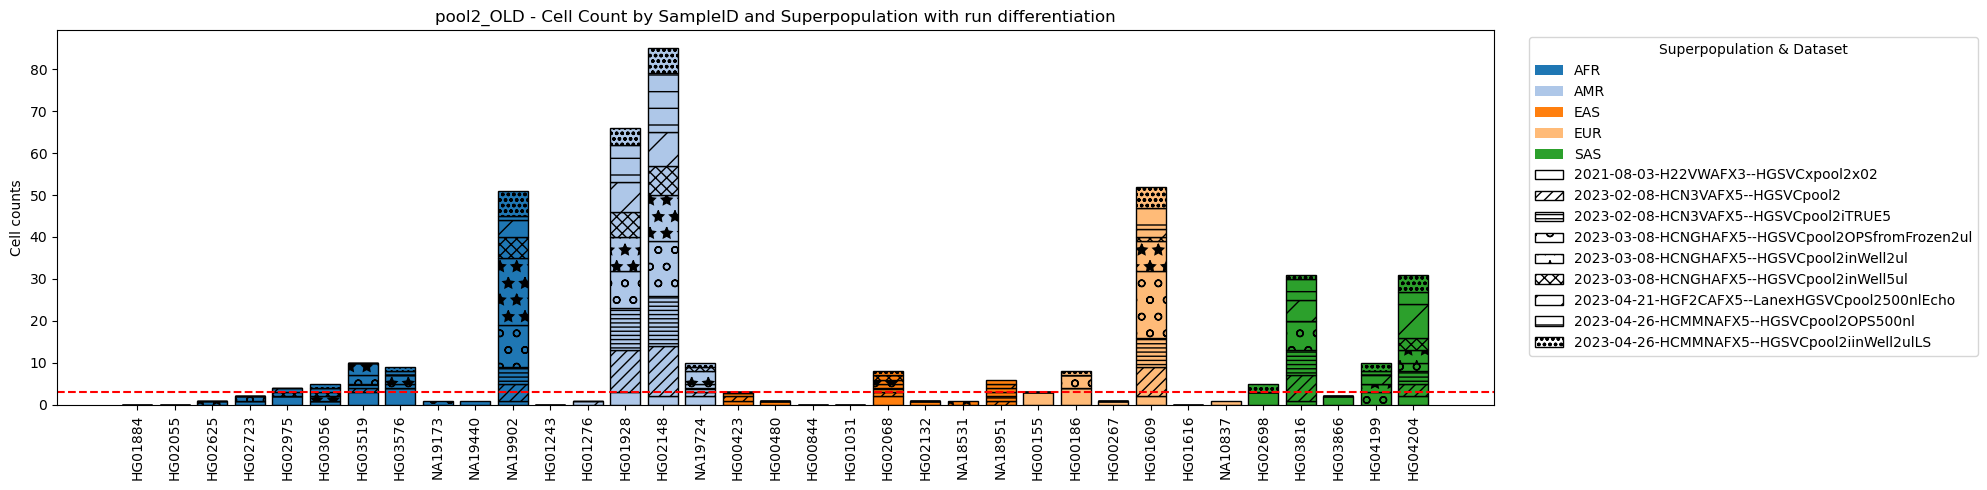

In [19]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import pandas as pd

# Ensure to replace this with the actual DataFrame you are working with
# df = pd.read_csv("your_data.csv")

plt.figure(figsize=(20,5))

ax = plt.gca()  # Get the current axes instance

# Ensure the axes background is white
ax.set_facecolor('white')

# Optionally, ensure the figure background is white
plt.gcf().set_facecolor('white')

# Create a set to keep track of labels already added to the legend
seen_labels = set()

# Assuming 'Dataset' column exists and is used for hatches. If not, adjust as needed.

#df = df.loc[df["PoolID"].str.contains("NEW")]
df = df.sort_values(by=["Superpopulation", "SampleID"])

datasets = df['PoolDataset'].unique()
hatch_patterns = ["", '///', '----', 'o', "*", "xxx", "/", "-", "ooo"]
hatch_dict = dict(zip(datasets, hatch_patterns[:len(datasets)]))

# Unique superpopulations and corresponding colors
unique_superpopulations = df['Superpopulation'].unique()
color_dict = dict(zip(unique_superpopulations, plt.cm.tab20.colors[:len(unique_superpopulations)]))

print(df.SampleID.nunique())

# Dictionary to keep track of the cumulative height for each SampleID
cumulative_heights = {sample_id: 0 for sample_id in df['SampleID'].unique()}

# Plot each bar with its corresponding color and hatch
for (i, row) in df.iterrows():
    label = row['Superpopulation'] if row['Superpopulation'] not in seen_labels else ""
    hatch = hatch_dict.get(row['PoolDataset'], '')  # Get the hatch pattern for the dataset
    
    # Plot bar with stacking
    bottom_value = cumulative_heights[row['SampleID']]
    ax.bar(row['SampleID'], row['cell'], color=color_dict[row['Superpopulation']], hatch=hatch, edgecolor="black", label=label, bottom=bottom_value)
    
    # Update the cumulative height for the SampleID
    cumulative_heights[row['SampleID']] += row['cell']
    
    seen_labels.add(row['Superpopulation'])

# Custom legend for superpopulations
legend_elements_superpop = [Patch(facecolor=color_dict[sp], label=sp) for sp in unique_superpopulations]

# Custom legend for datasets using hatches
legend_elements_dataset = [Patch(facecolor='white', edgecolor='black', hatch=hatch_dict[ds], label=f"{ds}") for ds in datasets]

# Combine the legends
plt.axhline(3, color="red", ls="--")
plt.legend(handles=legend_elements_superpop + legend_elements_dataset, title='Superpopulation & Dataset', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=90)
plt.ylabel('Cell counts')
plt.title(f'{k} - Cell Count by SampleID and Superpopulation with run differentiation')
plt.tight_layout()
plt.savefig(f"{output_dir}/{k}/cell_count_by_sample_and_superpop.png")

plt.show()


In [16]:
df

,Superpopulation,SampleID,cell,color,PoolID,PoolDataset,hatch
0,AFR,HG02307,5,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW,
0,AFR,HG02307,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
0,AFR,HG02307,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,***
1,AFR,HG02318,1,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW,
1,AFR,HG02318,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
...,...,...,...,...,...,...,...
37,SAS,NA20885,1,"(0.17254901960784313, 0.6274509803921569, 0.17...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,***
38,NaN,HG01453,0,"(0.596078431372549, 0.8745098039215686, 0.5411...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
38,NaN,HG01453,0,"(0.596078431372549, 0.8745098039215686, 0.5411...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,***
39,NaN,HG04128,0,"(0.596078431372549, 0.8745098039215686, 0.5411...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///


In [17]:
metadata = pd.read_csv("../20130606_g1k_3202_samples_ped_population.txt", sep=" ")
metadata.head()

,FamilyID,SampleID,FatherID,MotherID,Sex,Population,Superpopulation
0,HG00096,HG00096,0,0,1,GBR,EUR
1,HG00097,HG00097,0,0,2,GBR,EUR
2,HG00099,HG00099,0,0,2,GBR,EUR
3,HG00100,HG00100,0,0,2,GBR,EUR
4,HG00101,HG00101,0,0,1,GBR,EUR


In [18]:
import yaml
file_path = "pools_composition.yaml"
reference_sample_list = yaml.safe_load(open(file_path, "r"))

In [19]:
reference_sample_list.keys()

dict_keys(['pool1NEW', 'pool2NEW', 'pool3NEW', 'pool1', 'pool2', 'pool3'])

In [20]:
k.replace("_OLD", "")

'pool2_NEW'

In [21]:

reference_samples_with_metadata = pd.merge(
    pd.DataFrame([e.replace("GM", "NA") for e in reference_sample_list[k.replace("_", "").replace("OLD", "")]], columns=[k]).melt().rename(columns={"variable":"Pool", "value":"SampleID"}),
    metadata
)
reference_samples_with_metadata

,Pool,SampleID,FamilyID,FatherID,MotherID,Sex,Population,Superpopulation
0,pool2_NEW,HG00139,HG00139,0,0,1,GBR,EUR
1,pool2_NEW,HG00325,HG00325,0,0,1,FIN,EUR
2,pool2_NEW,HG00349,HG00349,0,0,2,FIN,EUR
3,pool2_NEW,HG00360,HG00360,0,0,1,FIN,EUR
4,pool2_NEW,HG00607,SH062,0,0,1,CHS,EAS
5,pool2_NEW,HG00634,SH071,0,0,1,CHS,EAS
6,pool2_NEW,HG01474,CLM57,0,0,2,CLM,AMR
7,pool2_NEW,HG01494,CLM64,0,0,1,CLM,AMR
8,pool2_NEW,HG01578,PEL005,0,0,2,PEL,AMR
9,pool2_NEW,HG01789,HG01789,0,0,1,GBR,EUR


In [22]:
df

,Superpopulation,SampleID,cell,color,PoolID,PoolDataset,hatch
0,AFR,HG02307,5,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW,
0,AFR,HG02307,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
0,AFR,HG02307,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,***
1,AFR,HG02318,1,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW,
1,AFR,HG02318,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
...,...,...,...,...,...,...,...
37,SAS,NA20885,1,"(0.17254901960784313, 0.6274509803921569, 0.17...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,***
38,NaN,HG01453,0,"(0.596078431372549, 0.8745098039215686, 0.5411...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///
38,NaN,HG01453,0,"(0.596078431372549, 0.8745098039215686, 0.5411...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,***
39,NaN,HG04128,0,"(0.596078431372549, 0.8745098039215686, 0.5411...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,///


/tmp/ipykernel_1068140/2994341156.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')
/tmp/ipykernel_1068140/2994341156.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.loc[df["cell"] > 0].groupby("Superpopulation")["SampleID"].nunique().reset_index(), x="Superpopulation", y="SampleID", palette=palette)


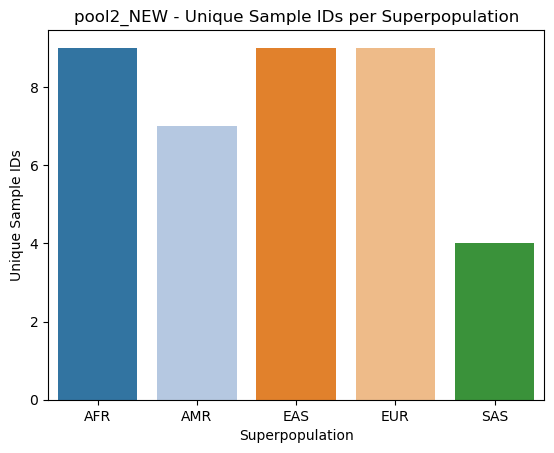

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merge_melt_pivot_table_stats_zscore is your DataFrame
grouped_data = df.groupby("Superpopulation")["SampleID"].nunique().reset_index()

# Unique superpopulations for color mapping
unique_superpopulations = grouped_data['Superpopulation'].unique()

# Generate a list of colors
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Create a color palette that Seaborn can use
palette = [color_dict[sp] for sp in grouped_data['Superpopulation']]


# Plot expected counts (background bars)
sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')


df.to_csv(f"{output_dir}/{k}/sample_by_superpop_recalled_DATA_background.csv", index=False, sep="\t")


# Plot
sns.barplot(data=df.loc[df["cell"] > 0].groupby("Superpopulation")["SampleID"].nunique().reset_index(), x="Superpopulation", y="SampleID", palette=palette)

ax = plt.gca()  # Get the current axes instance

# Ensure the axes background is white
ax.set_facecolor('white')

# Optionally, ensure the figure background is white
plt.gcf().set_facecolor('white')


plt.xlabel('Superpopulation')
plt.ylabel('Unique Sample IDs')
plt.title(f'{k} - Unique Sample IDs per Superpopulation')
plt.savefig(f"{output_dir}/{k}/sample_by_superpop_recalled.png")

plt.show()


In [24]:
import pandas as pd

pool_list = list()
#k = "pool1_OLD"
for e in d[k]:
    tmp_df = pd.read_csv(f"{pool_results_folder}/{e}/pivot_table_zscore_norm.tsv.gz", 
                 sep="\t", header=None, compression="gzip")
    #    tmp_df["PoolID"] = e.split("--")[1]
    # Set the first column as the index
    tmp_df.set_index(0, inplace=True)

    # Create a MultiIndex for the columns using the first two rows
    # The first row becomes the top level of the MultiIndex, and the second row becomes the second level
#    multi_index = pd.MultiIndex.from_arrays([tmp_df.iloc[0], tmp_df.iloc[1]])

    tmp_df.columns = tmp_df.iloc[1]
    
    # Drop the first two rows that were used to create the MultiIndex
    tmp_df = tmp_df.drop(tmp_df.index[:2])

    # Remove the row with NaN values if that's what you mean by the 'third' row
    # If 'third' row meant the original third row before we dropped two, it's already gone
    tmp_df.dropna(how='all', inplace=True)

    # Assign the MultiIndex to the DataFrame's columns
#    tmp_df.columns = tmp_df.iloc[1]

    # The DataFrame now has the first column as index and a MultiIndex for the columns
    e_lite = e.split('--')[1]
    tmp_df.index = [f"{e_lite}-{i}" for i in tmp_df.index.values]
    tmp_df.index.name="Cell"
#    tmp_df

    pool_list.append(tmp_df)

# Read the DataFrame without headers
df = pd.concat(pool_list)

df

SAMPLE,HG00139,HG00325,HG00349,HG00360,HG00607,HG00634,HG01474,HG01494,HG01578,HG01789,...,NA12891,NA18532,NA18567,NA19315,NA19658,NA19734,NA19747,NA20357,NA20587,NA20885
Cell,,,,,,,,,,,,,,,,,,,,,
LanexHGSVCpool2NEW-1A03,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,...,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,6.077929298860444,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991,-0.1739237309031991
LanexHGSVCpool2NEW-1A04,0.0,-0.17869743453458894,6.075712774176024,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,...,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894,-0.17869743453458894
LanexHGSVCpool2NEW-1A05,-0.570161700269707,-0.570161700269707,-0.570161700269707,0.7043173944508144,-0.570161700269707,-0.570161700269707,-0.570161700269707,0.7043173944508144,-0.570161700269707,0.7043173944508144,...,-0.570161700269707,-0.570161700269707,-0.570161700269707,3.253275583891858,-0.570161700269707,0.7043173944508144,-0.570161700269707,-0.570161700269707,-0.570161700269707,-0.570161700269707
LanexHGSVCpool2NEW-1A06,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,...,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.07699895988017166,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248,-0.17789414868867248
LanexHGSVCpool2NEW-1A08,-0.17010225923843314,-0.13989718516805716,-0.17010225923843314,-0.17010225923843314,-0.17010225923843314,-0.17010225923843314,-0.17010225923843314,-0.17010225923843314,-0.13989718516805716,-0.17010225923843314,...,-0.17010225923843314,-0.17010225923843314,-0.17010225923843314,-0.13989718516805716,-0.17010225923843314,-0.17010225923843314,-0.17010225923843314,6.082348073329395,-0.17010225923843314,-0.17010225923843314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HGSVCpool2NEW96wellUVLED-1A90,-0.19239760611749487,-0.19239760611749487,-0.19239760611749487,-0.19239760611749487,-0.19239760611749487,-0.11205574861788165,-0.19239760611749487,-0.19239760611749487,-0.19239760611749487,-0.19239760611749487,...,-0.19239760611749487,-0.19239760611749487,0.048627966381344846,-0.11205574861788165,-0.19239760611749487,-0.19239760611749487,-0.19239760611749487,-0.031713891118268396,-0.11205574861788165,-0.11205574861788165
HGSVCpool2NEW96wellUVLED-1A91,-0.20624530442602823,-0.08567112645388865,-0.20624530442602823,-0.20624530442602823,-0.08567112645388865,-0.20624530442602823,-0.20624530442602823,-0.20624530442602823,-0.20624530442602823,-0.20624530442602823,...,-0.08567112645388865,-0.20624530442602823,-0.20624530442602823,-0.20624530442602823,-0.20624530442602823,6.06361195012523,-0.20624530442602823,-0.20624530442602823,-0.20624530442602823,-0.20624530442602823
HGSVCpool2NEW96wellUVLED-1A93,-0.1862868801513504,-0.1862868801513504,-0.12364173461372814,-0.12364173461372814,-0.1862868801513504,-0.1862868801513504,-0.1862868801513504,-0.1862868801513504,-0.1862868801513504,-0.1862868801513504,...,-0.1862868801513504,-0.06099658907610588,-0.1862868801513504,-0.1862868801513504,-0.1862868801513504,-0.1862868801513504,-0.06099658907610588,-0.1862868801513504,-0.12364173461372814,-0.12364173461372814


In [25]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df

SAMPLE,HG00139,HG00325,HG00349,HG00360,HG00607,HG00634,HG01474,HG01494,HG01578,HG01789,...,NA12891,NA18532,NA18567,NA19315,NA19658,NA19734,NA19747,NA20357,NA20587,NA20885
Cell,,,,,,,,,,,,,,,,,,,,,
LanexHGSVCpool2NEW-1A03,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,...,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,6.077929,-0.173924,-0.173924,-0.173924,-0.173924
LanexHGSVCpool2NEW-1A04,0.000000,-0.178697,6.075713,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,...,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697
LanexHGSVCpool2NEW-1A05,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,0.704317,...,-0.570162,-0.570162,-0.570162,3.253276,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,-0.570162
LanexHGSVCpool2NEW-1A06,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,...,-0.177894,-0.177894,-0.177894,-0.177894,-0.076999,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894
LanexHGSVCpool2NEW-1A08,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,...,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,6.082348,-0.170102,-0.170102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HGSVCpool2NEW96wellUVLED-1A90,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.112056,-0.192398,-0.192398,-0.192398,-0.192398,...,-0.192398,-0.192398,0.048628,-0.112056,-0.192398,-0.192398,-0.192398,-0.031714,-0.112056,-0.112056
HGSVCpool2NEW96wellUVLED-1A91,-0.206245,-0.085671,-0.206245,-0.206245,-0.085671,-0.206245,-0.206245,-0.206245,-0.206245,-0.206245,...,-0.085671,-0.206245,-0.206245,-0.206245,-0.206245,6.063612,-0.206245,-0.206245,-0.206245,-0.206245
HGSVCpool2NEW96wellUVLED-1A93,-0.186287,-0.186287,-0.123642,-0.123642,-0.186287,-0.186287,-0.186287,-0.186287,-0.186287,-0.186287,...,-0.186287,-0.060997,-0.186287,-0.186287,-0.186287,-0.186287,-0.060997,-0.186287,-0.123642,-0.123642


/g/korbel2/weber/miniconda3/envs/notebook/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/g/korbel2/weber/miniconda3/envs/notebook/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


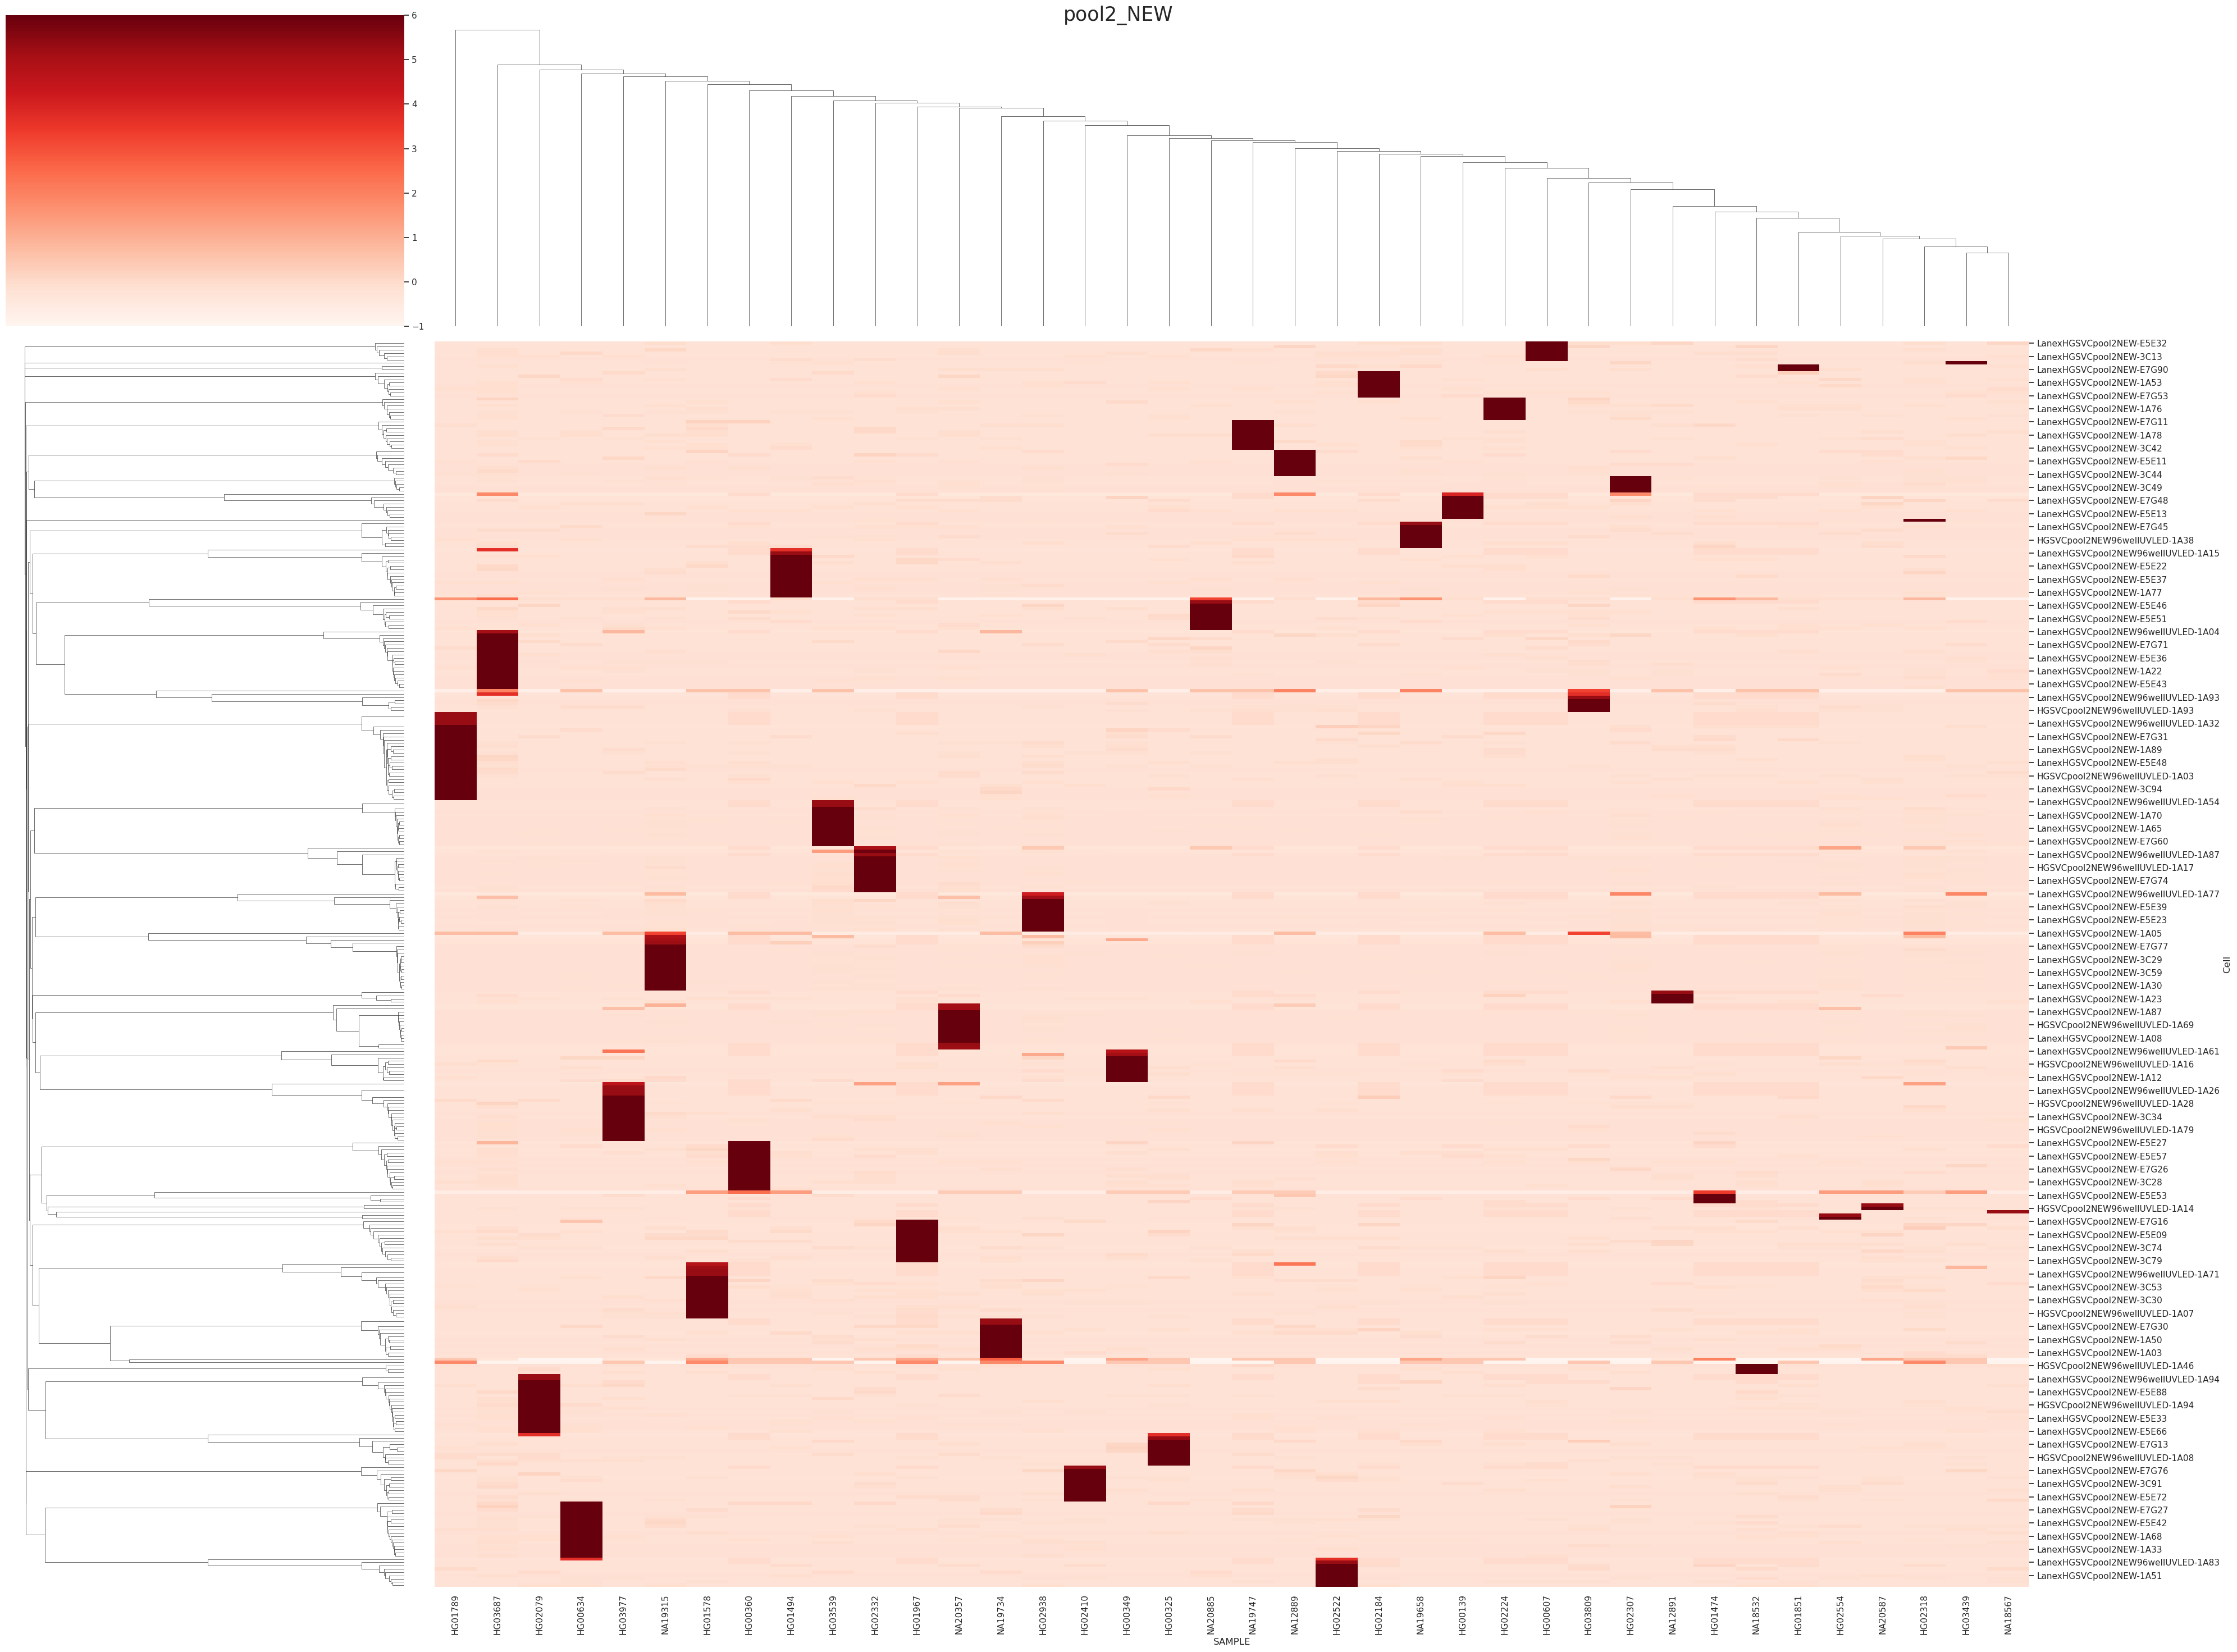

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# Assuming pivot_table_stats_zscore is your data
# Assuming df is your data frame and it's properly formatted with numeric values only

# Create the clustermap
cg = sns.clustermap(df, cmap="Reds", vmin=-1, vmax=6, figsize=(40, 30))

# Increase the figure size to make space for all labels if necessary
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=90)
plt.setp(cg.ax_heatmap.get_yticklabels(), rotation=0)

# We will need to draw the canvas to recompute the correct positions
plt.gcf().canvas.draw()

# Get the tick labels and set them again to make sure all are displayed
xtl = [item.get_text() for item in cg.ax_heatmap.get_xticklabels()]
ytl = [item.get_text() for item in cg.ax_heatmap.get_yticklabels()]

cg.ax_heatmap.set_xticklabels(xtl, rotation=90, ha='center', minor=False)
cg.ax_heatmap.set_yticklabels(ytl, rotation=0,   minor=False)
cg.ax_heatmap.figure.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9)


cg.fig.suptitle(f'{k}', fontsize=25)
# Adjust the subplot params to give some more space for the tick labels
#plt.subplots_adjust(right=0.85)

# Save the figure
output_file = f"{output_dir}/{k}/clustermap_zscore_cell_per_sample.png"
cg.savefig(output_file)
plt.tight_layout()
# Show the plot
plt.show()

# Set the x-tick labels manually

## Save the figure
#output_file = f"{output_dir}/{sample}/clustermap_zscore_cell_per_sample.png"
##ax.savefig(output_file)
#
##ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
##ax.set_xlabel("Sample")
##ax.set_ylabel("Cell Line")
#ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/clustermap_zscore_cell_per_sample.png")
#ax

In [27]:

# Rpy2

%load_ext rpy2.ipython 




In [28]:
df

SAMPLE,HG00139,HG00325,HG00349,HG00360,HG00607,HG00634,HG01474,HG01494,HG01578,HG01789,...,NA12891,NA18532,NA18567,NA19315,NA19658,NA19734,NA19747,NA20357,NA20587,NA20885
Cell,,,,,,,,,,,,,,,,,,,,,
LanexHGSVCpool2NEW-1A03,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,...,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,6.077929,-0.173924,-0.173924,-0.173924,-0.173924
LanexHGSVCpool2NEW-1A04,0.000000,-0.178697,6.075713,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,...,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697
LanexHGSVCpool2NEW-1A05,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,0.704317,...,-0.570162,-0.570162,-0.570162,3.253276,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,-0.570162
LanexHGSVCpool2NEW-1A06,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,...,-0.177894,-0.177894,-0.177894,-0.177894,-0.076999,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894
LanexHGSVCpool2NEW-1A08,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,...,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,6.082348,-0.170102,-0.170102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HGSVCpool2NEW96wellUVLED-1A90,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.112056,-0.192398,-0.192398,-0.192398,-0.192398,...,-0.192398,-0.192398,0.048628,-0.112056,-0.192398,-0.192398,-0.192398,-0.031714,-0.112056,-0.112056
HGSVCpool2NEW96wellUVLED-1A91,-0.206245,-0.085671,-0.206245,-0.206245,-0.085671,-0.206245,-0.206245,-0.206245,-0.206245,-0.206245,...,-0.085671,-0.206245,-0.206245,-0.206245,-0.206245,6.063612,-0.206245,-0.206245,-0.206245,-0.206245
HGSVCpool2NEW96wellUVLED-1A93,-0.186287,-0.186287,-0.123642,-0.123642,-0.186287,-0.186287,-0.186287,-0.186287,-0.186287,-0.186287,...,-0.186287,-0.060997,-0.186287,-0.186287,-0.186287,-0.186287,-0.060997,-0.186287,-0.123642,-0.123642


In [29]:
ref_count_merged = list()
for e in d[k]:
    tmp_df = pd.read_csv(f"{pool_results_folder}/{e}/reference_file_SNP_counts.tsv",sep="\t").drop(["Unnamed: 0"], axis=1)
    ref_count_merged.append(tmp_df)

ref_count = pd.concat(ref_count_merged)
ref_count

,GlobalSample,SAMPLE,ID
0,LanexHGSVCpool2NEW,HG00139,77926
1,LanexHGSVCpool2NEW,HG00325,79260
2,LanexHGSVCpool2NEW,HG00349,85351
3,LanexHGSVCpool2NEW,HG00360,80062
4,LanexHGSVCpool2NEW,HG00607,91606
...,...,...,...
33,HGSVCpool2NEW96wellUVLED,NA19734,68248
34,HGSVCpool2NEW96wellUVLED,NA19747,82568
35,HGSVCpool2NEW96wellUVLED,NA20357,359231
36,HGSVCpool2NEW96wellUVLED,NA20587,85220


In [30]:
pool_df = pd.DataFrame([[e.split("-")[0], e] for e in df.index], columns=["PoolID", "cell"])
pool_df

,PoolID,cell
0,LanexHGSVCpool2NEW,LanexHGSVCpool2NEW-1A03
1,LanexHGSVCpool2NEW,LanexHGSVCpool2NEW-1A04
2,LanexHGSVCpool2NEW,LanexHGSVCpool2NEW-1A05
3,LanexHGSVCpool2NEW,LanexHGSVCpool2NEW-1A06
4,LanexHGSVCpool2NEW,LanexHGSVCpool2NEW-1A08
...,...,...
375,HGSVCpool2NEW96wellUVLED,HGSVCpool2NEW96wellUVLED-1A90
376,HGSVCpool2NEW96wellUVLED,HGSVCpool2NEW96wellUVLED-1A91
377,HGSVCpool2NEW96wellUVLED,HGSVCpool2NEW96wellUVLED-1A93
378,HGSVCpool2NEW96wellUVLED,HGSVCpool2NEW96wellUVLED-1A94


In [31]:
pool_df.PoolID.unique()

array(['LanexHGSVCpool2NEW', 'LanexHGSVCpool2NEW96wellUVLED',
       'HGSVCpool2NEW96wellUVLED'], dtype=object)

In [32]:
ref_count.GlobalSample.unique()

array(['LanexHGSVCpool2NEW', 'LanexHGSVCpool2NEW96wellUVLED',
       'HGSVCpool2NEW96wellUVLED'], dtype=object)

In [33]:
%%R -i output_dir -i k  -i df -i metadata -i ref_count -i pool_df -w 2000 -h 1500
library(ComplexHeatmap)
library(circlize)
library(RColorBrewer)

set.seed(123) # for reproducibility
ordered_metadata <- metadata[match(colnames(df), metadata$SampleID), ]

# Map GlobalSample to the SAMPLE in pivot_table_stats_zscore
global_sample_annotation <- ref_count[match(colnames(df), ref_count$SAMPLE), "GlobalSample"]
ref_count

# Hex color codes provided by you
superpopulation_colors_hex <- c(
  "AFR" = "#3274A1",
  "AMR" = "#E1812C",
  "EAS" = "#EEBB89",
  "EUR" = "#B5C8E1",
  "SAS" = "#3A923A"
)


# Create a named vector to map cells to PoolID from pool_df
pool_annotation_vector <- setNames(pool_df$PoolID, pool_df$cell)

# Then, map each row name of the matrix to its PoolID
row_pool_annotation <- pool_annotation_vector[rownames(df)]

# Assuming pool_df is your data frame with PoolID
unique_pool_ids <- unique(pool_df$PoolID[!is.na(pool_df$PoolID)])  # Exclude NA values

# Generate colors
n_colors <- length(unique_pool_ids)
pool_colors <- colorRampPalette(brewer.pal(9, "Set1"))(n_colors)

names(pool_colors) <- unique_pool_ids

print(pool_colors)

# Prepare the pool_annotation with a named vector of colors
pool_annotation <- HeatmapAnnotation(
  PoolID = row_pool_annotation,
  col = list(PoolID = pool_colors),  # Ensure pool_colors is a named vector
    which="row",
  annotation_legend_param = list(
    PoolID = list(
      title = "Pool ID",  # Add title for the legend
      title_gp = gpar(fontsize = 16, fontface = "bold"),
      labels_gp = gpar(fontsize = 16)
    )
  )
)
print(pool_annotation)

# Assuming ordered_metadata is your metadata dataframe which has a column 'Superpopulation'

# Check if all superpopulations in your data are covered by the colors defined
if(!all(unique(ordered_metadata$Superpopulation) %in% names(superpopulation_colors_hex))) {
  stop("Not all superpopulations have a defined color")
}


# Generate distinct colors for each unique Population
unique_populations <- unique(ordered_metadata$Population)
population_colors <- RColorBrewer::brewer.pal(n = min(length(unique_populations), 9), name = "Set3")  # "Set3" is another palette suitable for categorical data
if (length(unique_populations) > 9) {
  population_colors <- colorRampPalette(RColorBrewer::brewer.pal(9, "Set3"))(length(unique_populations))
}
names(population_colors) <- unique_populations


# Create HeatmapAnnotation objects with the new colors
col_annotation <- HeatmapAnnotation(
  df = ordered_metadata[c("Population", "Superpopulation")],
  col = list(
    Population = population_colors,  # Apply the color mapping for Population
    Superpopulation = superpopulation_colors_hex  # Apply the color mapping
      
      
  ), 
  annotation_legend_param = list(
    Population = list( 
      title_gp = gpar(fontsize = 16, 
                      fontface = "bold"), 
      labels_gp = gpar(fontsize = 16)),
    Superpopulation = list( 
      title_gp = gpar(fontsize = 16,
                      fontface = "bold"), 
      labels_gp = gpar(fontsize = 16)))
   # pool = list( 
   #   title_gp = gpar(fontsize = 16,
   #                   fontface = "bold"), 
   #   labels_gp = gpar(fontsize = 16))
#  GlobalSample = global_sample_annotation  # Assuming global_sample_annotation is previously defined
)

# Convert the pandas DataFrame to an R matrix
mat <- as.matrix(df)
#print(head(mat))

#file_path <- paste(output_dir, sample_for_savedir, "clustermap_zscore_cell_per_sample_with_annotations.png", sep="/")
#png(file_path, width = 1800, height = 1500)

file_path <- paste(output_dir, k, "clustermap_zscore_cell_per_sample_with_annotations.png", sep="/")
png(file_path, width = 2000, height = 1500)

# Creating the heatmap
ht <- Heatmap(mat, 
        name = "z-score", 
        col = colorRamp2(c(-1, 6), c("white", "red")),
        top_annotation = col_annotation,
        right_annotation = pool_annotation, # Add pool annotation here
        cluster_rows = TRUE, 
        cluster_columns = TRUE,
        show_row_names = TRUE,
        show_column_names = TRUE,
              column_title=k,  column_title_gp = gpar(fontsize = 20),
       row_names_gp = gpar(fontsize = 6)) # Adjust fontsize as needed
              heatmap_legend_param = list(
                title_gp = gpar(fontsize = 14), # Adjust the title font size
                labels_gp = gpar(fontsize = 12), # Adjust the labels font size
                ncol = 1 # Use a single column for the legend items
              )

    
   


# Drawing the heatmap with the custom legend parameters
#draw(ht, heatmap_legend_list = legend_param)
draw(ht, heatmap_legend_side="left", annotation_legend_side="right",
           legend_grouping = "original")
dev.off()

/g/korbel2/weber/miniconda3/envs/notebook/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '
R[write to console]: Loading required package: grid

R[write to console]: ========================================
ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with

           LanexHGSVCpool2NEW LanexHGSVCpool2NEW96wellUVLED 
                    "#E41A1C"                     "#FF7F00" 
     HGSVCpool2NEW96wellUVLED 
                    "#999999" 
A HeatmapAnnotation object with 1 annotation
  name: heatmap_annotation_0 
  position: row 
  items: 380 
  width: 5mm 
  height: 1npc 
  this object is subsettable
  13.4925666666667mm extension on the bottom 

   name annotation_type color_mapping width
 PoolID discrete vector  user-defined   5mm
png 
  2 
